In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('/content/dataset1.csv', usecols=[0], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [18]:
dataframe.head()

,Year
1990,118
1991,125
1992,133
1993,145
1994,150


In [19]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1990 to 2020
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    31 non-null     int64
dtypes: int64(1)
memory usage: 496.0 bytes


In [23]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,31.0,278.516129,135.600607,118.0,155.5,222.0,417.5,511.0


In [5]:
dataset

array([[118.],
       [125.],
       [133.],
       [145.],
       [150.],
       [152.],
       [159.],
       [167.],
       [179.],
       [146.],
       [148.],
       [179.],
       [184.],
       [197.],
       [206.],
       [222.],
       [241.],
       [255.],
       [326.],
       [337.],
       [357.],
       [385.],
       [413.],
       [422.],
       [433.],
       [438.],
       [443.],
       [480.],
       [485.],
       [498.],
       [511.]], dtype=float32)

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.70)#trainDataset70%
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [8]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [9]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [10]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))###16size
model.add(Dense(1))## Predict one value (Kato)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)## epochs=100
model.summary()


Epoch 1/100
19/19 [==============================] - 2s 2ms/step - loss: 0.0573
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0754
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0840
Epoch 4/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0390
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0246
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0189
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 11/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 12/100
19/19 [==============================] - 0s 1ms/step - loss: 0.0196
Epoch 13/100
19/19 [=================

In [11]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [12]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [13]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 26.16 RMSE
Test Score: 69.09 RMSE


In [14]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [15]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


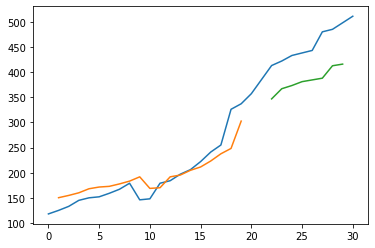

In [16]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))

plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()